## Soar into Data - EDA
---

### Contents
1. Imports
2. Data overview
3. Data Visualziation
4. Data Cleaning

---

#### 1. Imports

In [924]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

---

#### 2. Data Overview

This is where we look at the data and check out all the features, what data types it holds, and what is means in the dataset

In [925]:
skin_data = pd.read_csv('./isic-2024-challenge/train-metadata.csv')
test_data = pd.read_csv('./isic-2024-challenge/test-metadata.csv')

/var/folders/_h/v0t9lgvx06g5lqdwl364573w0000gn/T/ipykernel_82480/3341297013.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  skin_data = pd.read_csv('./isic-2024-challenge/train-metadata.csv')


In [926]:
skin_data.head()

isic_id  target  patient_id  age_approx   sex anatom_site_general  \
0  ISIC_0015670       0  IP_1235828        60.0  male     lower extremity   
1  ISIC_0015845       0  IP_8170065        60.0  male           head/neck   
2  ISIC_0015864       0  IP_6724798        60.0  male     posterior torso   
3  ISIC_0015902       0  IP_4111386        65.0  male      anterior torso   
4  ISIC_0024200       0  IP_8313778        55.0  male      anterior torso   

   clin_size_long_diam_mm          image_type tbp_tile_type   tbp_lv_A  ...  \
0                    3.04  TBP tile: close-up     3D: white  20.244422  ...   
1                    1.10  TBP tile: close-up     3D: white  31.712570  ...   
2                    3.40  TBP tile: close-up        3D: XP  22.575830  ...   
3                    3.22  TBP tile: close-up        3D: XP  14.242329  ...   
4                    2.73  TBP tile: close-up     3D: white  24.725520  ...   

    lesion_id  iddx_full  iddx_1  iddx_2  iddx_3  iddx_4  iddx_5  \
0         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
1  IL_6727506     Benign  Benign     NaN     NaN     NaN     NaN   
2         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
3         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
4         NaN     Benign  Benign     NaN     NaN     NaN     NaN   

   mel_mitotic_index  mel_thick_mm  tbp_lv_dnn_lesion_confidence  
0                NaN           NaN                     97.517282  
1                NaN           NaN                      3.141455  
2                NaN           NaN                     99.804040  
3                NaN           NaN                     99.989998  
4                NaN           NaN                     70.442510  

[5 rows x 55 columns]

In [927]:
skin_data.describe()

target     age_approx  clin_size_long_diam_mm       tbp_lv_A  \
count  401059.000000  398261.000000           401059.000000  401059.000000   
mean        0.000980      58.012986                3.930827      19.974007   
std         0.031288      13.596165                1.743068       3.999489   
min         0.000000       5.000000                1.000000      -2.487115   
25%         0.000000      50.000000                2.840000      17.330821   
50%         0.000000      60.000000                3.370000      19.801910   
75%         0.000000      70.000000                4.380000      22.304628   
max         1.000000      85.000000               28.400000      48.189610   

         tbp_lv_Aext       tbp_lv_B    tbp_lv_Bext       tbp_lv_C  \
count  401059.000000  401059.000000  401059.000000  401059.000000   
mean       14.919247      28.281706      26.913015      34.786341   
std         3.529384       5.278676       4.482994       5.708469   
min        -9.080269      -0.730989       9.237066       3.054228   
25%        12.469740      24.704372      23.848125      31.003148   
50%        14.713930      28.171570      26.701704      34.822580   
75%        17.137175      31.637429      29.679913      38.430298   
max        37.021680      54.306900      48.372700      58.765170   

         tbp_lv_Cext       tbp_lv_H  ...  tbp_lv_radial_color_std_max  \
count  401059.000000  401059.000000  ...                401059.000000   
mean       30.921279      54.653689  ...                     1.016459   
std         4.829345       5.520849  ...                     0.734631   
min        11.846520      -1.574164  ...                     0.000000   
25%        27.658285      51.566273  ...                     0.563891   
50%        30.804893      55.035632  ...                     0.902281   
75%        33.963868      58.298184  ...                     1.334523   
max        54.305290     105.875784  ...                    11.491140   

         tbp_lv_stdL  tbp_lv_stdLExt  tbp_lv_symm_2axis  \
count  401059.000000   401059.000000      401059.000000   
mean        2.715190        2.238605           0.306823   
std         1.738165        0.623884           0.125038   
min         0.268160        0.636247           0.052034   
25%         1.456570        1.834745           0.211429   
50%         2.186693        2.149758           0.282297   
75%         3.474565        2.531443           0.382022   
max        17.563650       25.534791           0.977055   

       tbp_lv_symm_2axis_angle       tbp_lv_x       tbp_lv_y       tbp_lv_z  \
count            401059.000000  401059.000000  401059.000000  401059.000000   
mean                 86.332073      -3.091862    1039.598221      55.823389   
std                  52.559511     197.257995     409.819653      87.968245   
min                   0.000000    -624.870728   -1052.134000    -291.890442   
25%                  40.000000    -147.022125     746.519673      -8.962647   
50%                  90.000000      -5.747253    1172.803000      67.957947   
75%                 130.000000     140.474835    1342.131540     126.611567   
max                 175.000000     614.471700    1887.766846     319.407000   

       mel_thick_mm  tbp_lv_dnn_lesion_confidence  
count     63.000000                  4.010590e+05  
mean       0.670952                  9.716220e+01  
std        0.792798                  8.995782e+00  
min        0.200000                  1.261082e-16  
25%        0.300000                  9.966882e+01  
50%        0.400000                  9.999459e+01  
75%        0.600000                  9.999996e+01  
max        5.000000                  1.000000e+02  

[8 rows x 37 columns]

In [928]:
feature_datapoints = skin_data.count()
print(feature_datapoints)

isic_id                         401059
target                          401059
patient_id                      401059
age_approx                      398261
sex                             389542
anatom_site_general             395303
clin_size_long_diam_mm          401059
image_type                      401059
tbp_tile_type                   401059
tbp_lv_A                        401059
tbp_lv_Aext                     401059
tbp_lv_B                        401059
tbp_lv_Bext                     401059
tbp_lv_C                        401059
tbp_lv_Cext                     401059
tbp_lv_H                        401059
tbp_lv_Hext                     401059
tbp_lv_L                        401059
tbp_lv_Lext                     401059
tbp_lv_areaMM2                  401059
tbp_lv_area_perim_ratio         401059
tbp_lv_color_std_mean           401059
tbp_lv_deltaA                   401059
tbp_lv_deltaB                   401059
tbp_lv_deltaL                   401059
tbp_lv_deltaLB           

55 Features across a total of 401,059 datapoints 

37 numerical features and 18 categorical features 



In [929]:
numerical_features = skin_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = skin_data.select_dtypes(include=['object']).columns.tolist()

features_df = pd.DataFrame({
    "Feature Type": ["Numerical"] * len(numerical_features) + ["Categorical"] * len(categorical_features),
    "Feature Name": numerical_features + categorical_features
})
print(features_df)

   Feature Type                  Feature Name
0     Numerical                        target
1     Numerical                    age_approx
2     Numerical        clin_size_long_diam_mm
3     Numerical                      tbp_lv_A
4     Numerical                   tbp_lv_Aext
5     Numerical                      tbp_lv_B
6     Numerical                   tbp_lv_Bext
7     Numerical                      tbp_lv_C
8     Numerical                   tbp_lv_Cext
9     Numerical                      tbp_lv_H
10    Numerical                   tbp_lv_Hext
11    Numerical                      tbp_lv_L
12    Numerical                   tbp_lv_Lext
13    Numerical                tbp_lv_areaMM2
14    Numerical       tbp_lv_area_perim_ratio
15    Numerical         tbp_lv_color_std_mean
16    Numerical                 tbp_lv_deltaA
17    Numerical                 tbp_lv_deltaB
18    Numerical                 tbp_lv_deltaL
19    Numerical                tbp_lv_deltaLB
20    Numerical            tbp_lv_

In [930]:
benign = skin_data['target'].value_counts()[0] # benign
malignant = skin_data['target'].value_counts()[1] # malignant
print(f'Dataset contains {benign} benign classifications and {malignant} malignant classifications. Each associated with a unique image')

Dataset contains 400666 benign classifications and 393 malignant classifications. Each associated with a unique image


Lets double check for FP, and FN (i.e a misdiagnosis)

In [931]:
false_positives = skin_data[(skin_data['target'] == 0) & (skin_data['iddx_full'].str.contains('Malignant', na=False))]
false_negatives = skin_data[(skin_data['target'] == 1) & (~skin_data['iddx_full'].str.contains('Malignant', na=False))]

print(f"False Positives (FP): {len(false_positives)}")
print(f"False Negatives (FN): {len(false_negatives)}")

False Positives (FP): 0
False Negatives (FN): 0


##### Summary of Data



We categorized this dataset into groups: 
1. Simple Data --> Categorical or numerical features that are more intuitive to understand as features such as "sex", "age", "general location" etc
2. TBP Data --> Data that was captured using TBP (Total Body 3D Picturing)


#### 3. Data Visualization

##### Simple Features and it's correlation with malignant and benign cases

We analyze the correlations between simple features such as age, sex, diamaeter size of lesions, and   to check for any correlations

In [932]:
malignant = skin_data[skin_data['target'] == 1]
benign = skin_data[skin_data['target'] == 0]

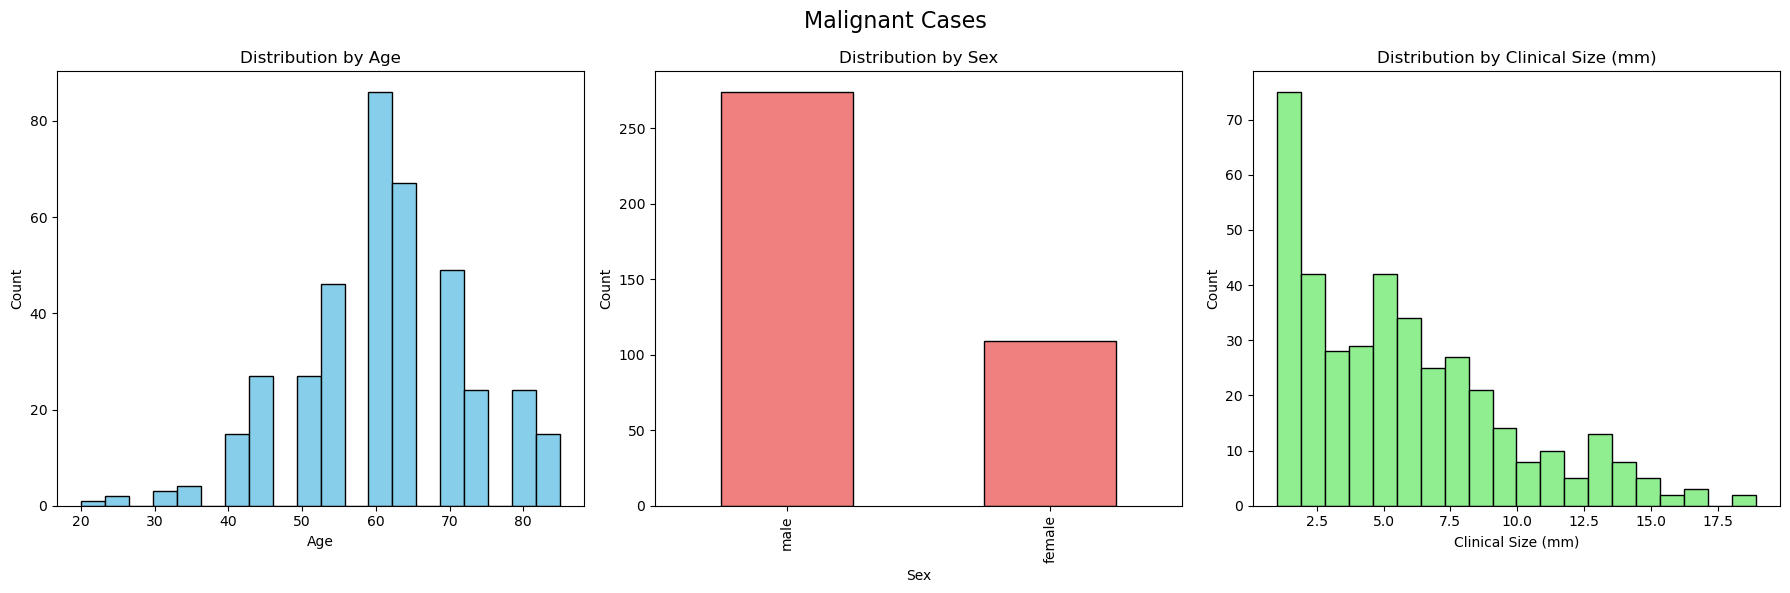

In [933]:
def plot_malignant_cases(malignant_cases):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Plot 1: Distribution by Age
    axes[0].hist(malignant_cases['age_approx'], bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title('Distribution by Age')
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('Count')

    # Plot 2: Distribution by Sex
    malignant_cases['sex'].value_counts().plot(kind='bar', ax=axes[1], color='lightcoral', edgecolor='black')
    axes[1].set_title('Distribution by Sex')
    axes[1].set_xlabel('Sex')
    axes[1].set_ylabel('Count')

    # Plot 3: Distribution by Clinical Size
    axes[2].hist(malignant_cases['clin_size_long_diam_mm'], bins=20, color='lightgreen', edgecolor='black')
    axes[2].set_title('Distribution by Clinical Size (mm)')
    axes[2].set_xlabel('Clinical Size (mm)')
    axes[2].set_ylabel('Count')

    fig.suptitle('Malignant Cases', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_malignant_cases(malignant)


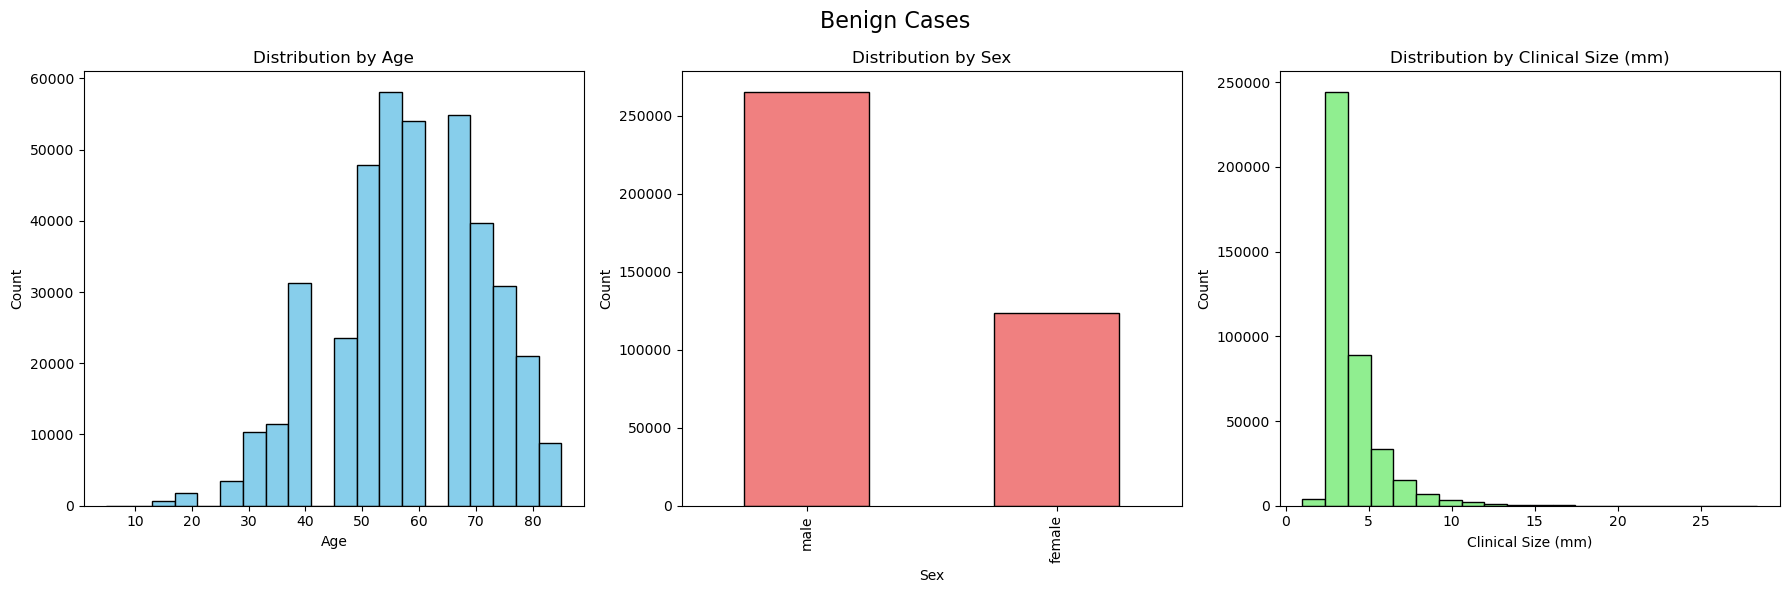

In [934]:
def plot_benign_cases(benign_cases):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Plot 1: Distribution by Age
    axes[0].hist(benign_cases['age_approx'], bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title('Distribution by Age')
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('Count')

    # Plot 2: Distribution by Sex
    benign_cases['sex'].value_counts().plot(kind='bar', ax=axes[1], color='lightcoral', edgecolor='black')
    axes[1].set_title('Distribution by Sex')
    axes[1].set_xlabel('Sex')
    axes[1].set_ylabel('Count')

    # Plot 3: Distribution by Clinical Size
    axes[2].hist(benign_cases['clin_size_long_diam_mm'], bins=20, color='lightgreen', edgecolor='black')
    axes[2].set_title('Distribution by Clinical Size (mm)')
    axes[2].set_xlabel('Clinical Size (mm)')
    axes[2].set_ylabel('Count')

    fig.suptitle('Benign Cases', fontsize=16)
    plt.tight_layout()
    
    plt.show()

plot_benign_cases(benign)

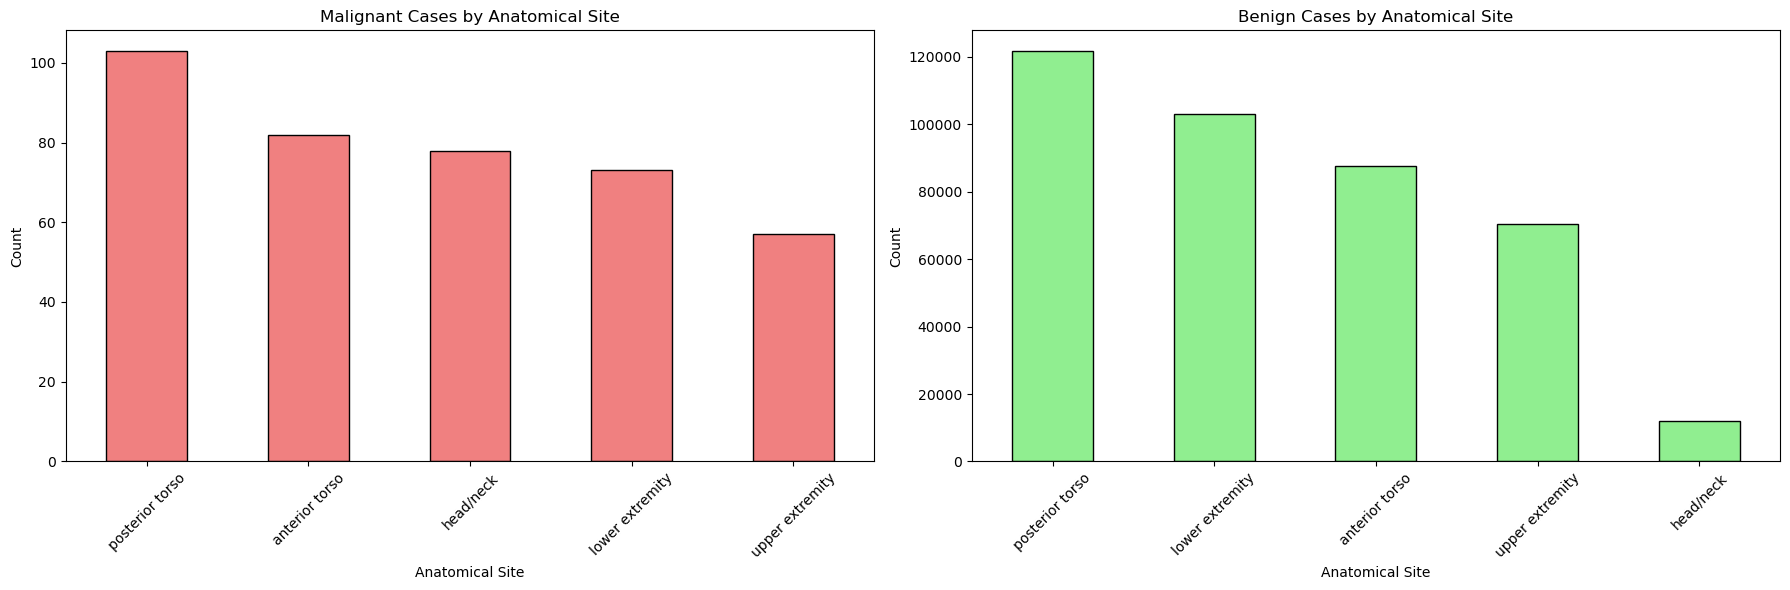

In [935]:
def plot_cases_by_anatomical_site(malignant_cases, benign_cases):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Plot 1: Malignant cases by anatomical site
    malignant_cases['anatom_site_general'].value_counts().plot(
        kind='bar', ax=axes[0], color='lightcoral', edgecolor='black'
    )
    axes[0].set_title('Malignant Cases by Anatomical Site')
    axes[0].set_xlabel('Anatomical Site')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)

    # Plot 2: Benign cases by anatomical site
    benign_cases['anatom_site_general'].value_counts().plot(
        kind='bar', ax=axes[1], color='lightgreen', edgecolor='black'
    )
    axes[1].set_title('Benign Cases by Anatomical Site')
    axes[1].set_xlabel('Anatomical Site')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_cases_by_anatomical_site(malignant, benign)

Posterior --> Back or towards back of body

Anteriror --> Front or towards front of body

Upper --> Shoulders to fingertips

Lower --> Hip to Toes

##### TBP Data

In [936]:
skin_data.head()

isic_id  target  patient_id  age_approx   sex anatom_site_general  \
0  ISIC_0015670       0  IP_1235828        60.0  male     lower extremity   
1  ISIC_0015845       0  IP_8170065        60.0  male           head/neck   
2  ISIC_0015864       0  IP_6724798        60.0  male     posterior torso   
3  ISIC_0015902       0  IP_4111386        65.0  male      anterior torso   
4  ISIC_0024200       0  IP_8313778        55.0  male      anterior torso   

   clin_size_long_diam_mm          image_type tbp_tile_type   tbp_lv_A  ...  \
0                    3.04  TBP tile: close-up     3D: white  20.244422  ...   
1                    1.10  TBP tile: close-up     3D: white  31.712570  ...   
2                    3.40  TBP tile: close-up        3D: XP  22.575830  ...   
3                    3.22  TBP tile: close-up        3D: XP  14.242329  ...   
4                    2.73  TBP tile: close-up     3D: white  24.725520  ...   

    lesion_id  iddx_full  iddx_1  iddx_2  iddx_3  iddx_4  iddx_5  \
0         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
1  IL_6727506     Benign  Benign     NaN     NaN     NaN     NaN   
2         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
3         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
4         NaN     Benign  Benign     NaN     NaN     NaN     NaN   

   mel_mitotic_index  mel_thick_mm  tbp_lv_dnn_lesion_confidence  
0                NaN           NaN                     97.517282  
1                NaN           NaN                      3.141455  
2                NaN           NaN                     99.804040  
3                NaN           NaN                     99.989998  
4                NaN           NaN                     70.442510  

[5 rows x 55 columns]

##### Color


### Feature Descriptions

| Feature                     | Meaning                                                                 |
|-----------------------------|-------------------------------------------------------------------------|
| **tbp_lv_C**, **tbp_lv_Cext** | Chroma (color intensity) inside/outside lesion                        |
| **tbp_lv_H**, **tbp_lv_Hext** | Hue inside/outside lesion (angle in LAB* space)                       |
| **tbp_lv_L**, **tbp_lv_Lext** | Lightness inside/outside lesion                                       |
| **tbp_lv_deltaA**, **tbp_lv_deltaB**, **tbp_lv_deltaL** | Contrast between lesion and surrounding skin in A/B/L channels |
| **tbp_lv_deltaLBnorm**       | Normalized LAB contrast between lesion and nearby skin                 |
| **tbp_lv_color_std_mean**    | Color irregularity (within lesion)                                    |
| **tbp_lv_norm_color**        | Normalized color variation (0–10 scale)                               |
| **tbp_lv_radial_color_std_max** | Color asymmetry from center outward                                |

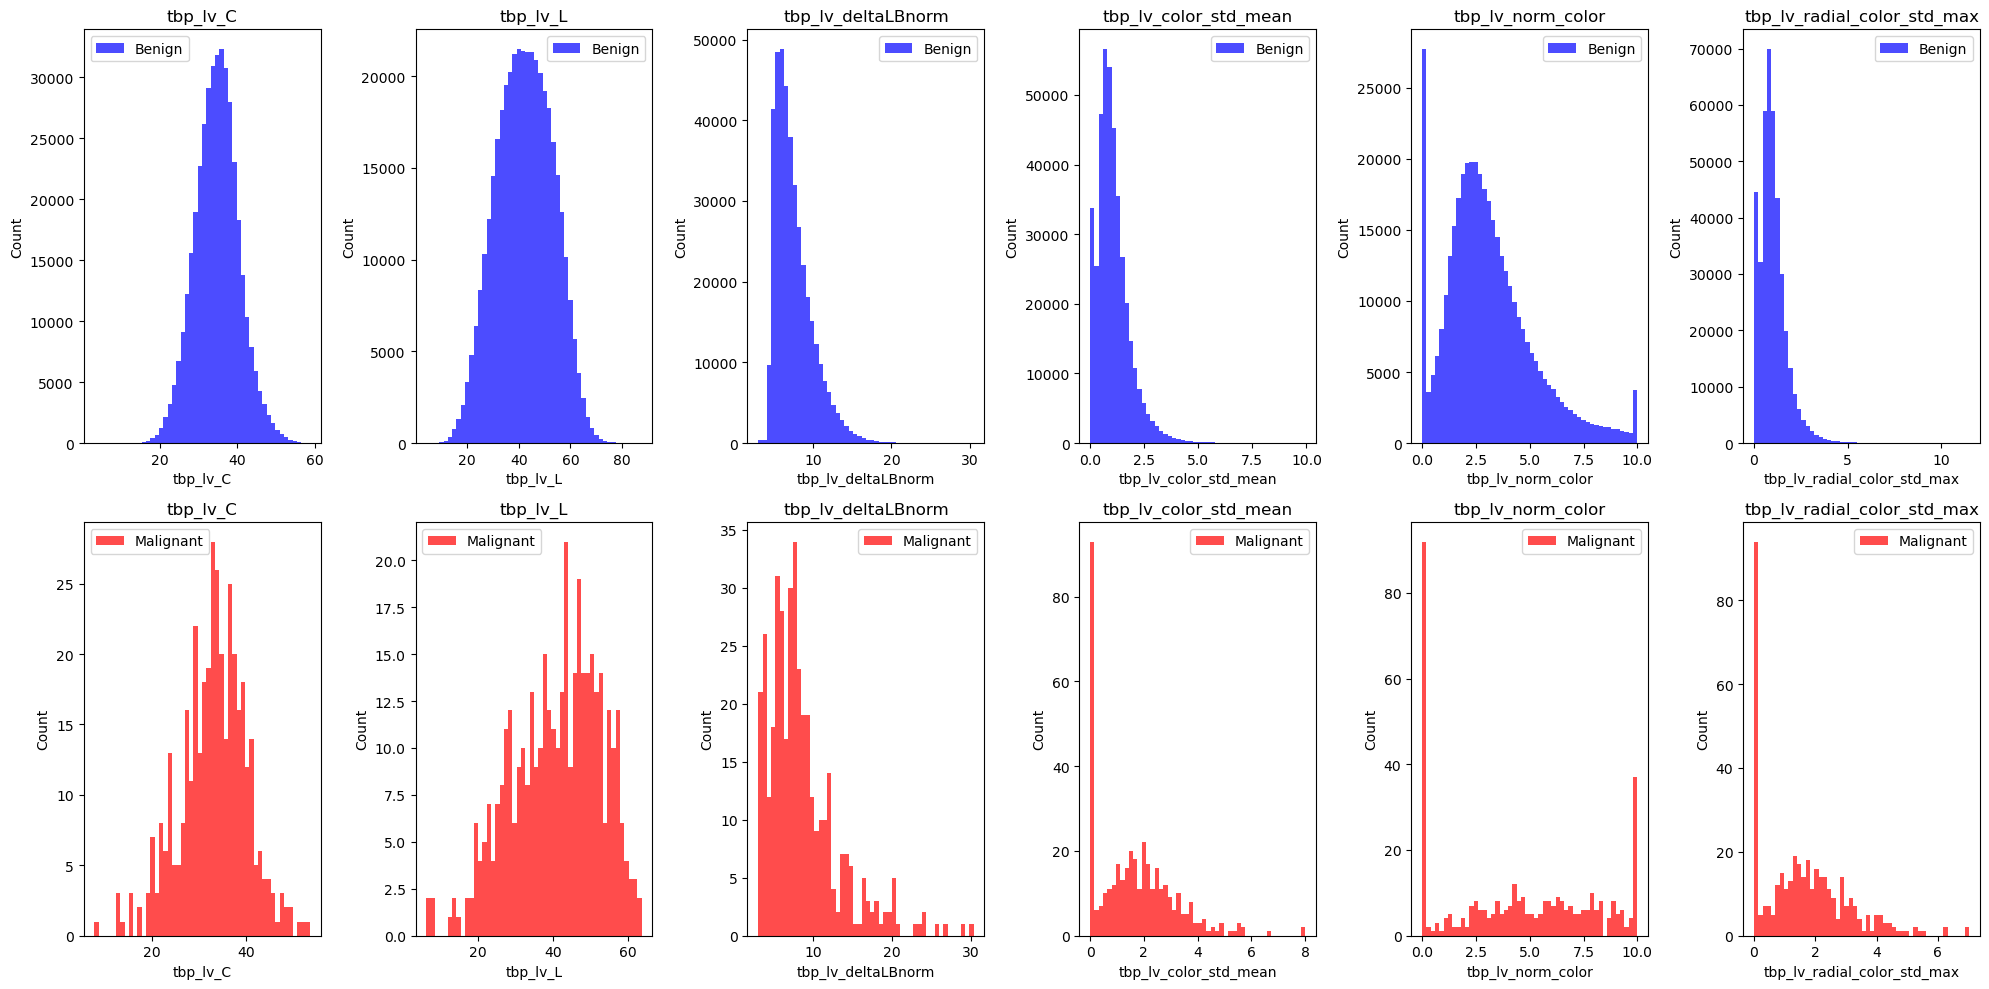

In [937]:
def plot_color_feature_histograms(df, color_features):
    """
    Plots histograms of color features as subplots for benign and malignant cases.
    Each feature has two rows: one for benign and one for malignant cases.
    """
    benign = df[df['target'] == 0]
    malignant = df[df['target'] == 1]

    num_features = len(color_features)
    cols = 6 
    rows = 2

    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    axes = axes.flatten()

    for i, feature in enumerate(color_features):

        ax_benign = axes[i]
        ax_benign.hist(benign[feature], bins=50, alpha=0.7, color='blue', label="Benign")
        ax_benign.set_title(f"{feature}")
        ax_benign.set_xlabel(feature)
        ax_benign.set_ylabel("Count")
        ax_benign.legend()


        ax_malignant = axes[i + cols]
        ax_malignant.hist(malignant[feature], bins=50, alpha=0.7, color='red', label="Malignant")
        ax_malignant.set_title(f"{feature}")
        ax_malignant.set_xlabel(feature)
        ax_malignant.set_ylabel("Count")
        ax_malignant.legend()


    for j in range(2 * len(color_features), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


color_features = [
    'tbp_lv_C', 'tbp_lv_L', 'tbp_lv_deltaLBnorm',
    'tbp_lv_color_std_mean', 'tbp_lv_norm_color',
    'tbp_lv_radial_color_std_max'
]
plot_color_feature_histograms(skin_data, color_features)

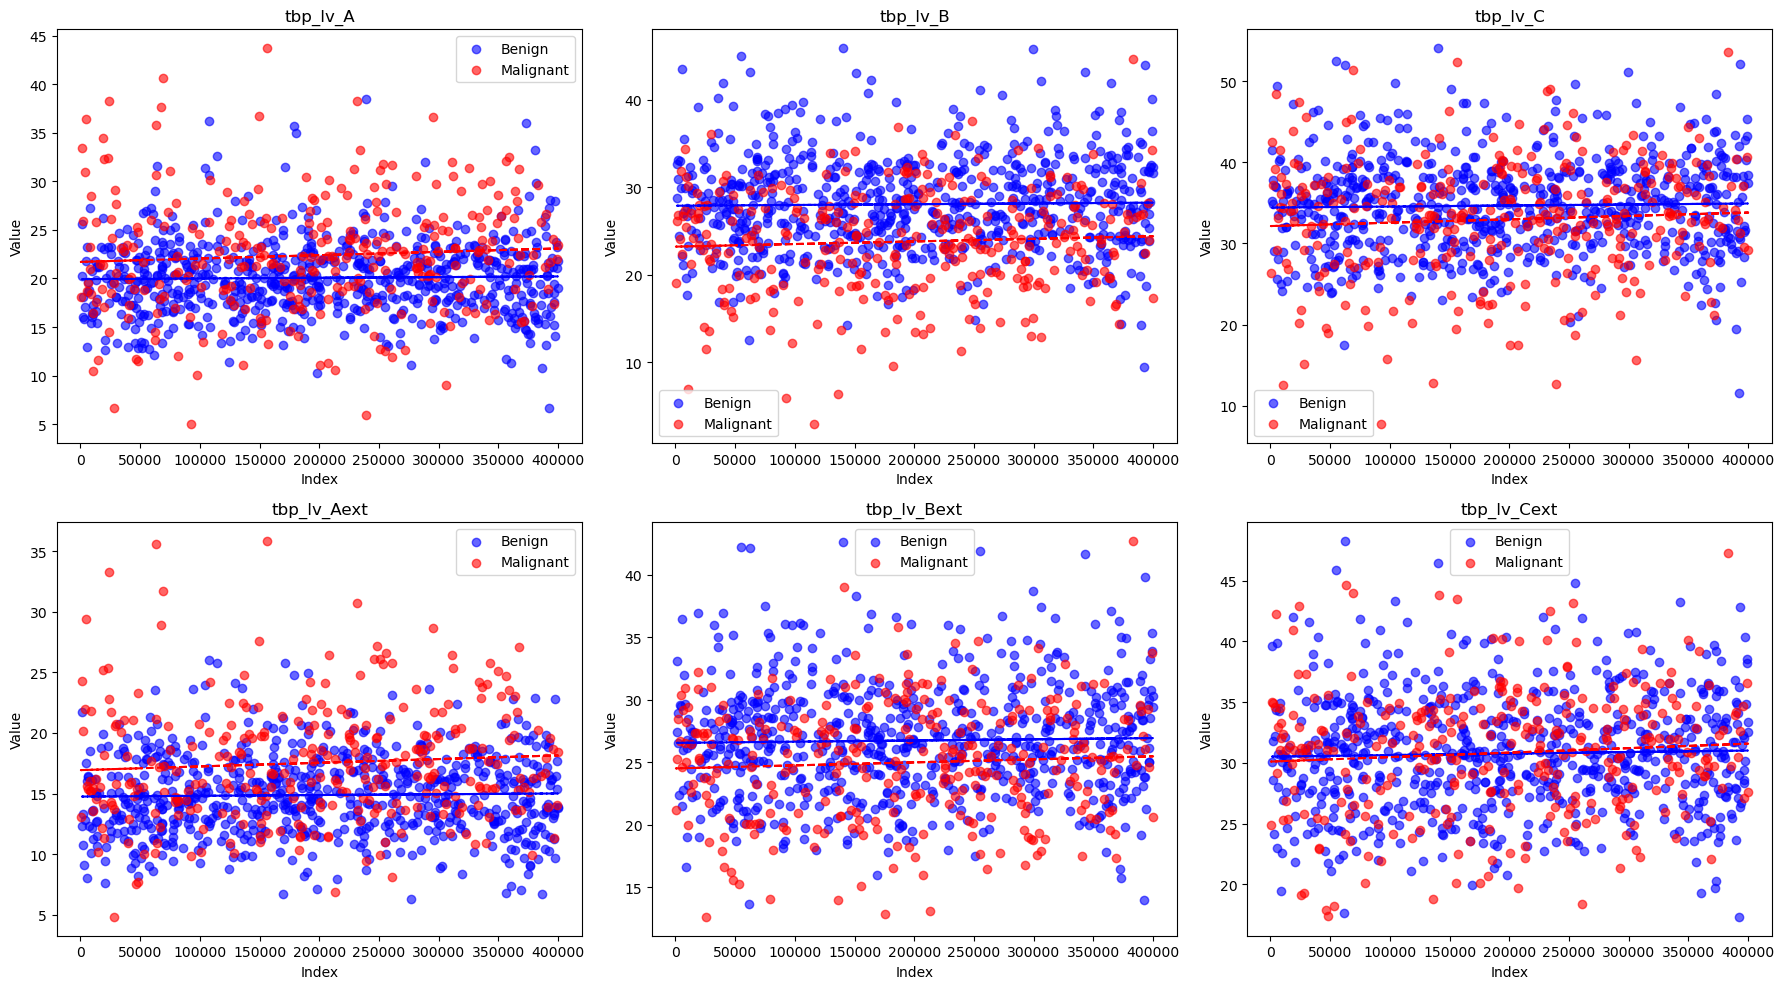

In [938]:
def plot_tbp_lv_subset_with_fit(skin_data):
    """
    Plots tbp_lv_A, tbp_lv_B, tbp_lv_C, and their respective 'ext' columns for a subset of 300 data points.
    Adds a line of best fit for malignant and benign cases.
    """

    benign_subset = skin_data[skin_data['target'] == 0].sample(700, random_state=42)
    malignant_subset = skin_data[skin_data['target'] == 1].sample(300, random_state=42)


    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    for i, feature in enumerate(['tbp_lv_A', 'tbp_lv_B', 'tbp_lv_C']):

        axes[0, i].scatter(benign_subset.index, benign_subset[feature], color='blue', label='Benign', alpha=0.6)
        axes[0, i].scatter(malignant_subset.index, malignant_subset[feature], color='red', label='Malignant', alpha=0.6)


        benign_fit = np.polyfit(benign_subset.index, benign_subset[feature], 1)
        axes[0, i].plot(benign_subset.index, np.polyval(benign_fit, benign_subset.index), color='blue', linestyle='--')


        malignant_fit = np.polyfit(malignant_subset.index, malignant_subset[feature], 1)
        axes[0, i].plot(malignant_subset.index, np.polyval(malignant_fit, malignant_subset.index), color='red', linestyle='--')

        axes[0, i].set_title(feature)
        axes[0, i].set_xlabel('Index')
        axes[0, i].set_ylabel('Value')
        axes[0, i].legend()

    for i, feature in enumerate(['tbp_lv_Aext', 'tbp_lv_Bext', 'tbp_lv_Cext']):

        axes[1, i].scatter(benign_subset.index, benign_subset[feature], color='blue', label='Benign', alpha=0.6)
        axes[1, i].scatter(malignant_subset.index, malignant_subset[feature], color='red', label='Malignant', alpha=0.6)


        benign_fit = np.polyfit(benign_subset.index, benign_subset[feature], 1)
        axes[1, i].plot(benign_subset.index, np.polyval(benign_fit, benign_subset.index), color='blue', linestyle='--')


        malignant_fit = np.polyfit(malignant_subset.index, malignant_subset[feature], 1)
        axes[1, i].plot(malignant_subset.index, np.polyval(malignant_fit, malignant_subset.index), color='red', linestyle='--')

        axes[1, i].set_title(feature)
        axes[1, i].set_xlabel('Index')
        axes[1, i].set_ylabel('Value')
        axes[1, i].legend()

    plt.tight_layout()
    plt.show()


plot_tbp_lv_subset_with_fit(skin_data)


tbp_lv_A --> Polarized Light --> Reduces skin surface reflection to reveal subsurface patterns (e.g., pigmentation, blood vessels)

tbp_lv_B --> Non-polarized Light --> Captures surface texture, scaliness, and sharp edges

tbp_lv_C --> Chroma (Color Mode) --> Measures color richness/saturation differences

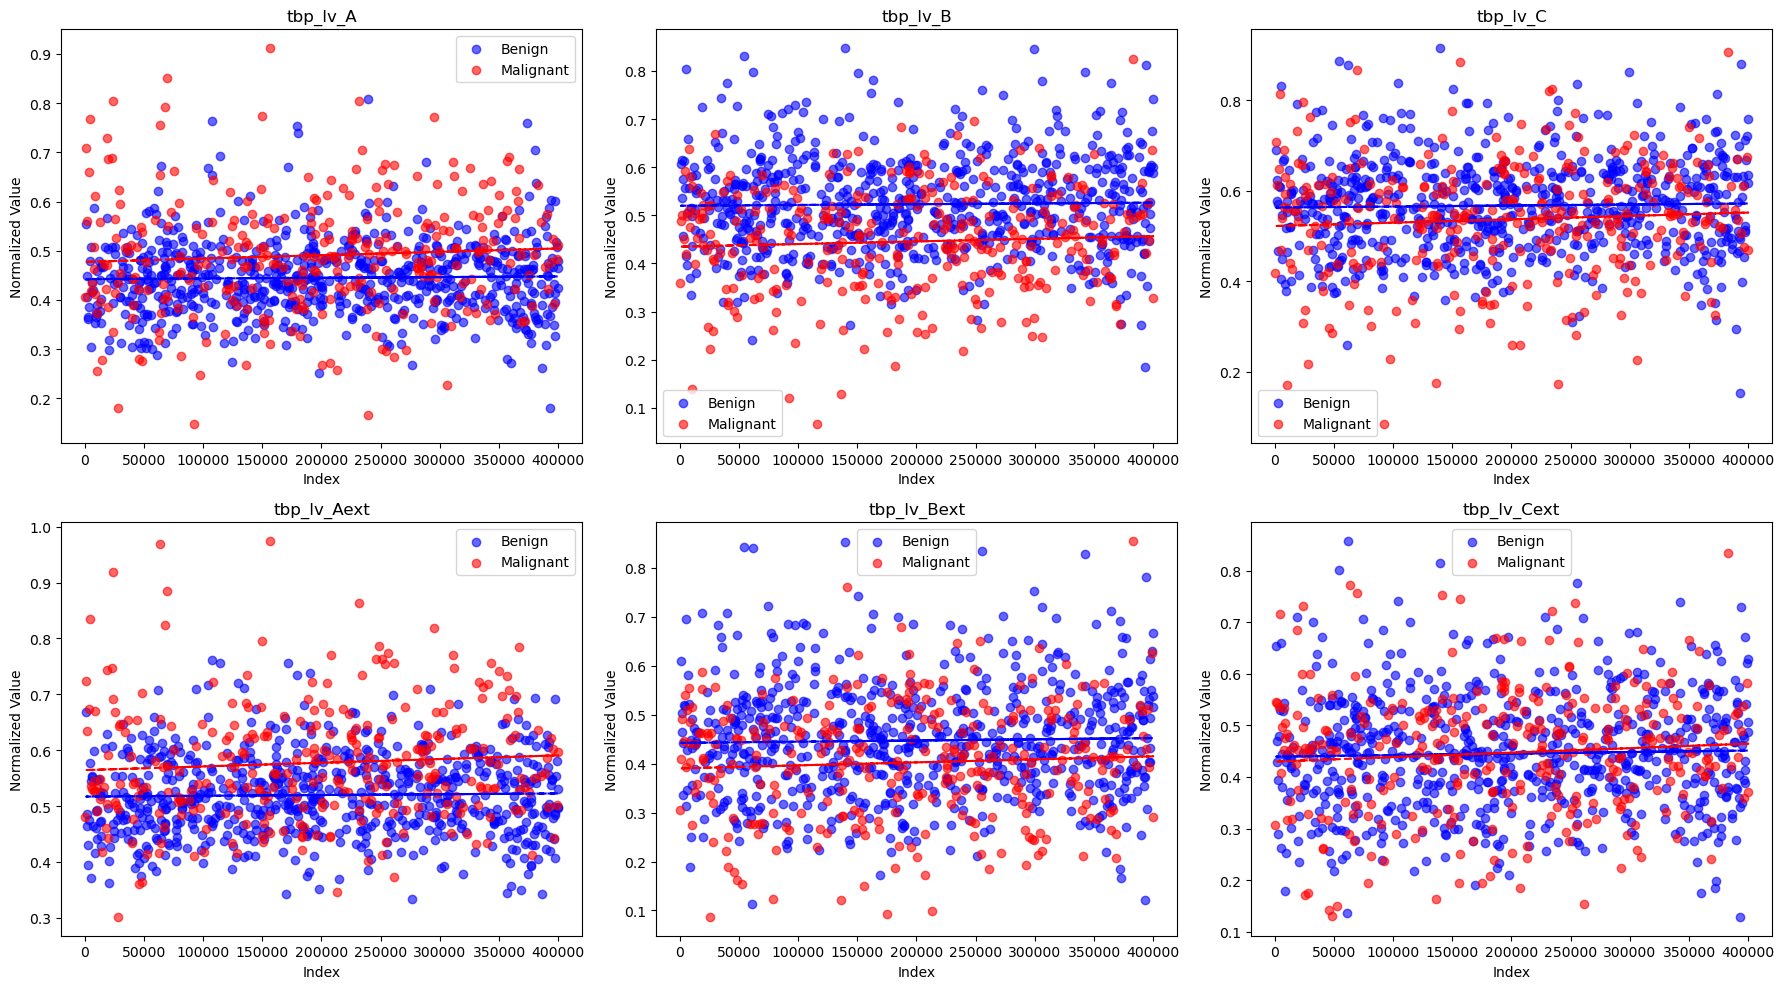

In [939]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(data, columns_to_normalize):
    """
    Normalize the specified columns in the dataset using Min-Max scaling.
    """
    scaler = MinMaxScaler()
    data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
    return data


columns_to_normalize = ['tbp_lv_A', 'tbp_lv_B', 'tbp_lv_C', 'tbp_lv_Aext', 'tbp_lv_Bext', 'tbp_lv_Cext']
normalized_skin_data = normalize_data(skin_data.copy(), columns_to_normalize)

def plot_tbp_lv_subset_with_fit(normalized_skin_data):
    """
    Plots normalized tbp_lv_A, tbp_lv_B, tbp_lv_C, and their respective 'ext' columns for a subset of 300 data points.
    Adds a line of best fit for malignant and benign cases.
    """
    benign_subset = normalized_skin_data[normalized_skin_data['target'] == 0].sample(700, random_state=42)
    malignant_subset = normalized_skin_data[normalized_skin_data['target'] == 1].sample(300, random_state=42)


    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    for i, feature in enumerate(['tbp_lv_A', 'tbp_lv_B', 'tbp_lv_C']):

        axes[0, i].scatter(benign_subset.index, benign_subset[feature], color='blue', label='Benign', alpha=0.6)
        axes[0, i].scatter(malignant_subset.index, malignant_subset[feature], color='red', label='Malignant', alpha=0.6)


        benign_fit = np.polyfit(benign_subset.index, benign_subset[feature], 1)
        axes[0, i].plot(benign_subset.index, np.polyval(benign_fit, benign_subset.index), color='blue', linestyle='--')


        malignant_fit = np.polyfit(malignant_subset.index, malignant_subset[feature], 1)
        axes[0, i].plot(malignant_subset.index, np.polyval(malignant_fit, malignant_subset.index), color='red', linestyle='--')

        axes[0, i].set_title(feature)
        axes[0, i].set_xlabel('Index')
        axes[0, i].set_ylabel('Normalized Value')
        axes[0, i].legend()

    for i, feature in enumerate(['tbp_lv_Aext', 'tbp_lv_Bext', 'tbp_lv_Cext']):

        axes[1, i].scatter(benign_subset.index, benign_subset[feature], color='blue', label='Benign', alpha=0.6)
        axes[1, i].scatter(malignant_subset.index, malignant_subset[feature], color='red', label='Malignant', alpha=0.6)


        benign_fit = np.polyfit(benign_subset.index, benign_subset[feature], 1)
        axes[1, i].plot(benign_subset.index, np.polyval(benign_fit, benign_subset.index), color='blue', linestyle='--')


        malignant_fit = np.polyfit(malignant_subset.index, malignant_subset[feature], 1)
        axes[1, i].plot(malignant_subset.index, np.polyval(malignant_fit, malignant_subset.index), color='red', linestyle='--')

        axes[1, i].set_title(feature)
        axes[1, i].set_xlabel('Index')
        axes[1, i].set_ylabel('Normalized Value')
        axes[1, i].legend()

    plt.tight_layout()
    plt.show()


plot_tbp_lv_subset_with_fit(normalized_skin_data)

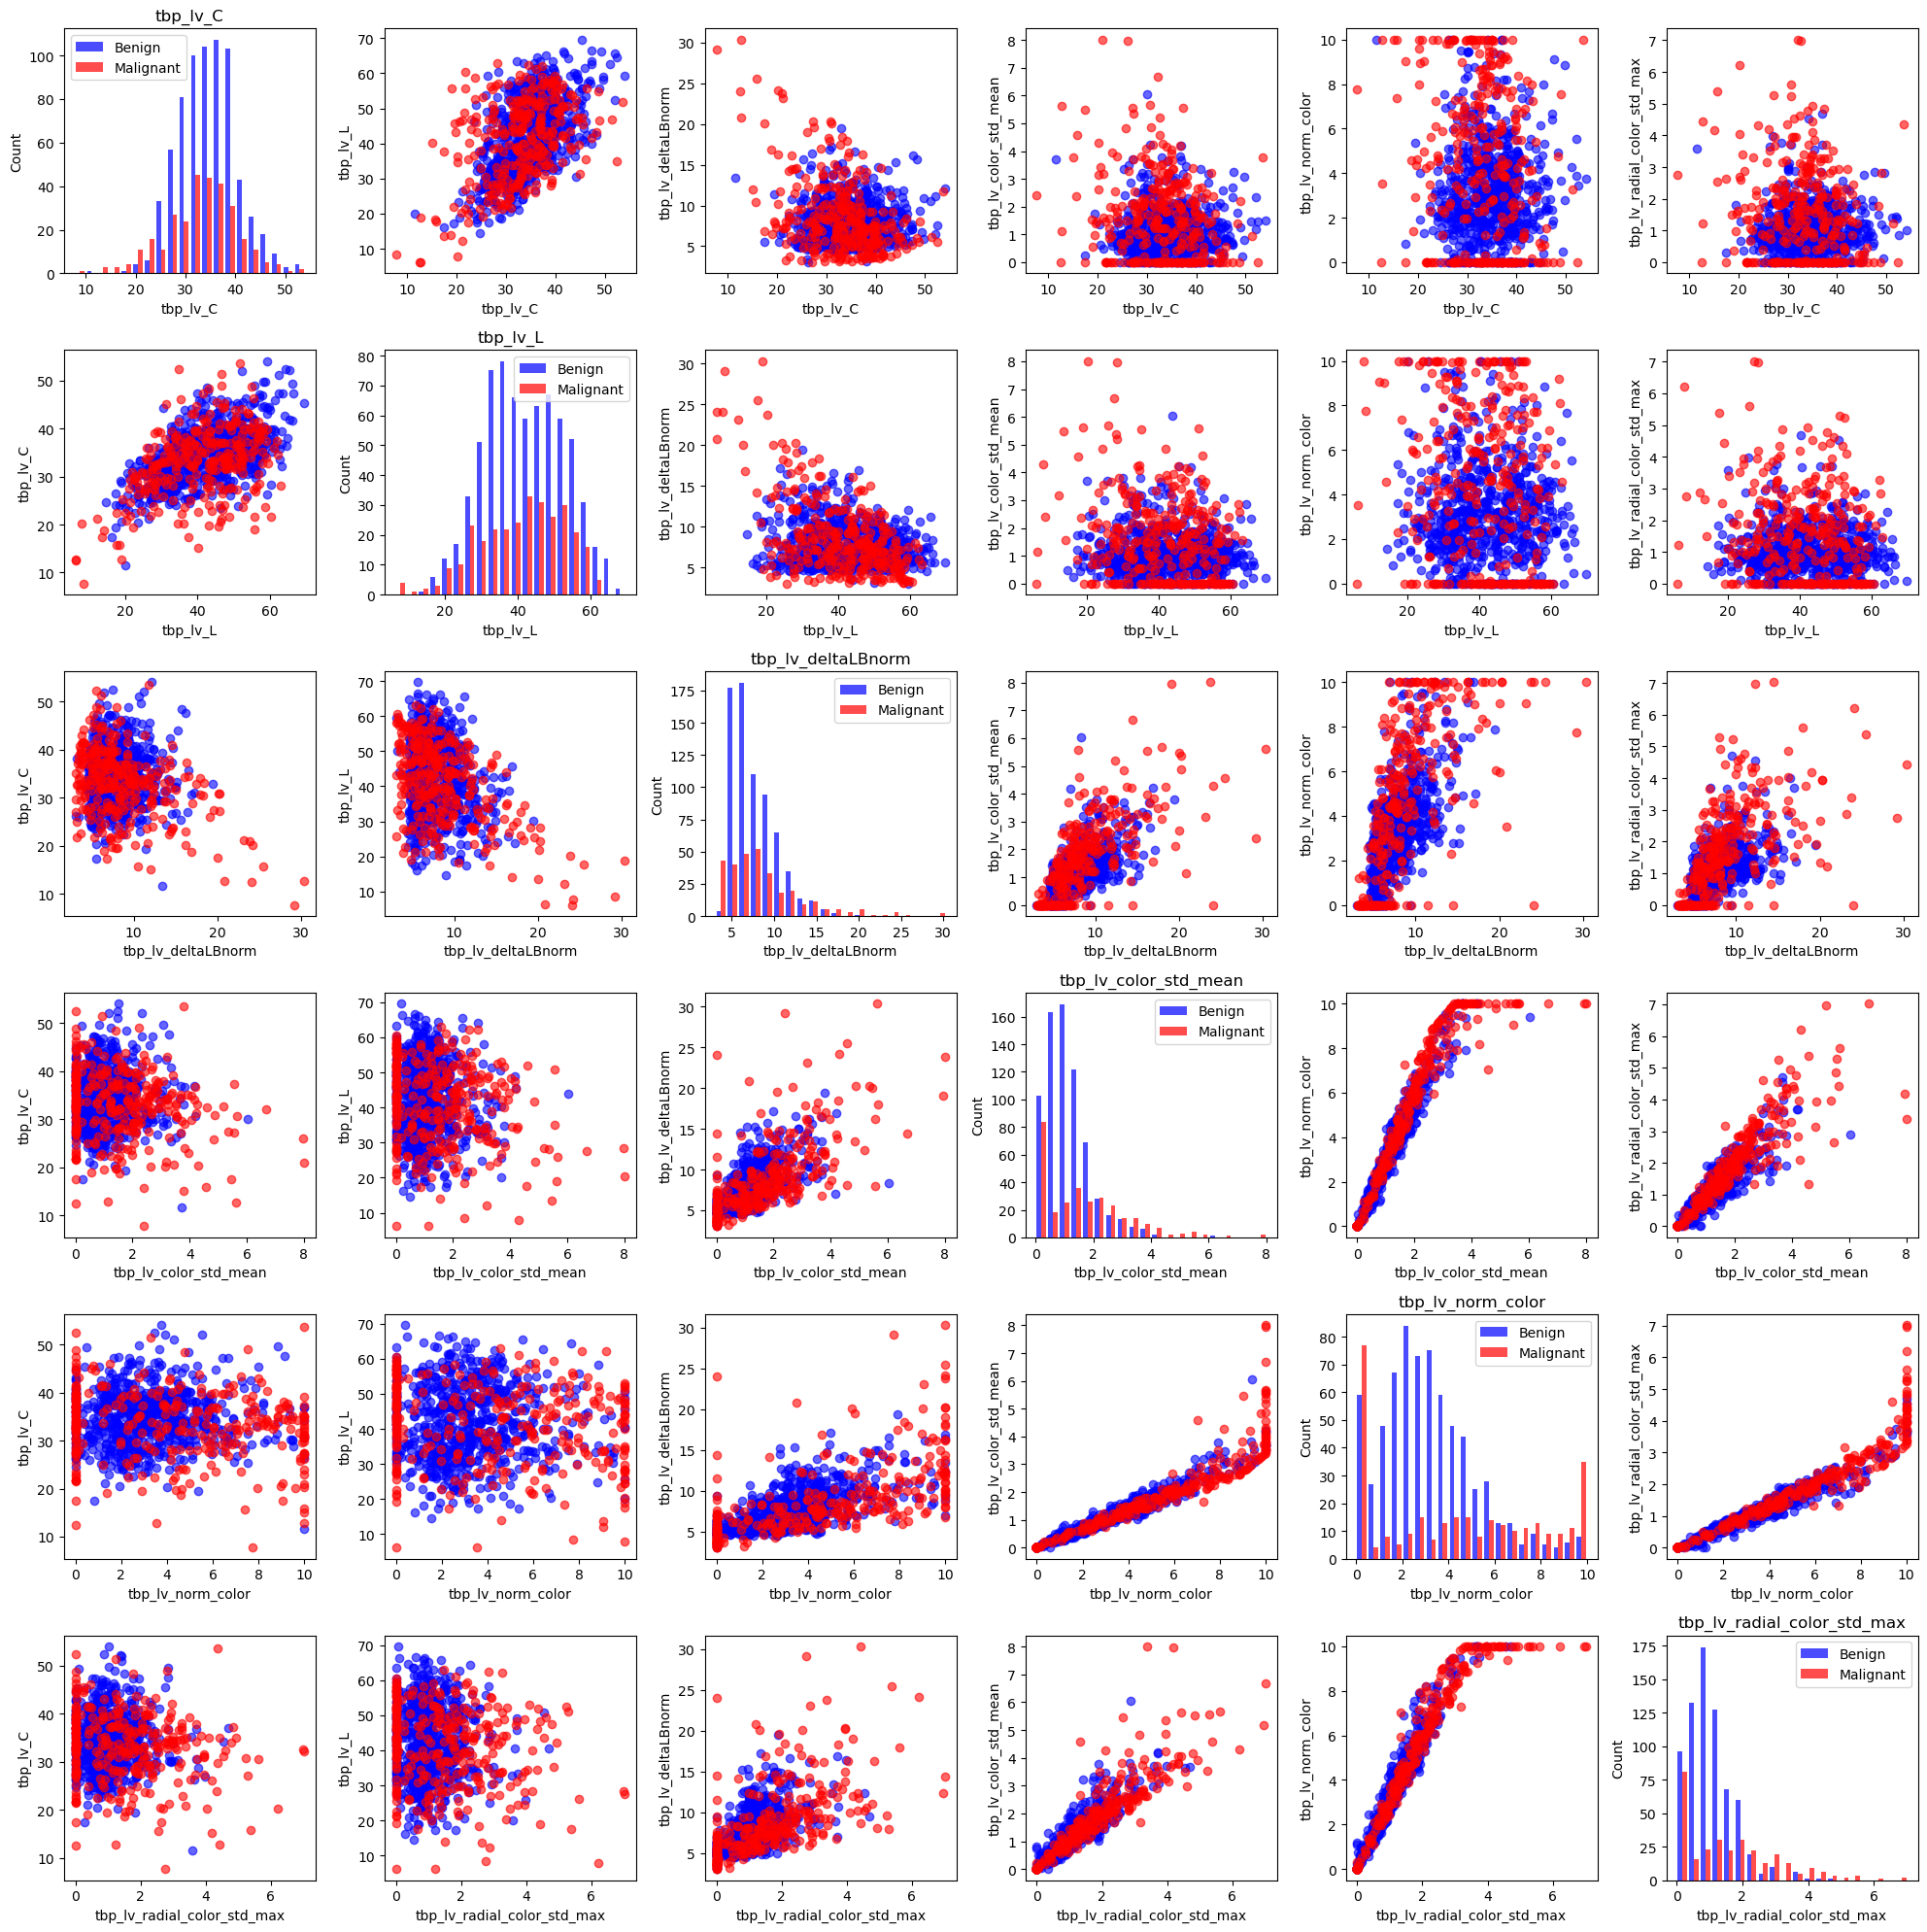

In [940]:
def scatter_plot_color_features(data, color_features, benign_sample_size=700, malignant_sample_size=300):

    benign_data = data[data['target'] == 0].sample(benign_sample_size, random_state=42)
    malignant_data = data[data['target'] == 1].sample(malignant_sample_size, random_state=42)


    sampled_data = pd.concat([benign_data, malignant_data])


    num_features = len(color_features)
    fig, axes = plt.subplots(num_features, num_features, figsize=(20, 20))

    for i, feature_x in enumerate(color_features):
        for j, feature_y in enumerate(color_features):
            ax = axes[i, j]
            if i == j:

                ax.hist(
                    [benign_data[feature_x], malignant_data[feature_x]],
                    bins=20,
                    color=['blue', 'red'],
                    label=['Benign', 'Malignant'],
                    alpha=0.7,
                )
                ax.set_title(feature_x)
                ax.set_xlabel(feature_x)
                ax.set_ylabel("Count")
                ax.legend()
            else:

                ax.scatter(
                    benign_data[feature_x],
                    benign_data[feature_y],
                    color='blue',
                    alpha=0.6,
                    label='Benign',
                )
                ax.scatter(
                    malignant_data[feature_x],
                    malignant_data[feature_y],
                    color='red',
                    alpha=0.6,
                    label='Malignant',
                )
                ax.set_xlabel(feature_x)
                ax.set_ylabel(feature_y)
                if j == 0:
                    ax.set_ylabel(feature_y)
                if i == num_features - 1:
                    ax.set_xlabel(feature_x)

    plt.tight_layout()
    plt.show()

# Example usage:
color_features = [
    'tbp_lv_C', 'tbp_lv_L', 'tbp_lv_deltaLBnorm',
    'tbp_lv_color_std_mean', 'tbp_lv_norm_color',
    'tbp_lv_radial_color_std_max'
]
scatter_plot_color_features(skin_data, color_features)

🔥 1. tbp_lv_norm_color vs tbp_lv_radial_color_std_max
Why interesting:

tbp_lv_norm_color = normalized color variation (texture/irregularity)

tbp_lv_radial_color_std_max = asymmetry from center outward

Malignant lesions tend to be:

Both irregular and asymmetric in color distribution

Expectation: Malignant cases cluster in upper-right quadrant (high/high)

⚡ 2. tbp_lv_color_std_mean vs tbp_lv_deltaLBnorm
Why interesting:

tbp_lv_color_std_mean = internal color irregularity

tbp_lv_deltaLBnorm = contrast vs background skin (visibility)

Malignant lesions can be:

Visibly distinct (deltaLBnorm high) and internally irregular

Expectation: Malignant lesions with high contrast and patchiness

🎯 3. tbp_lv_C vs tbp_lv_L
Why interesting:

tbp_lv_C = color intensity (chroma)

tbp_lv_L = lightness

Combined, they represent the core components of color in the LAB space.

Expectation: Malignant lesions may have low lightness + high chroma (dark & colorful)

🧪 4. tbp_lv_norm_color vs tbp_lv_deltaLBnorm
Why interesting:

Mix of internal variation + external contrast

Helpful for lesions that are both visibly sharp and visually irregular

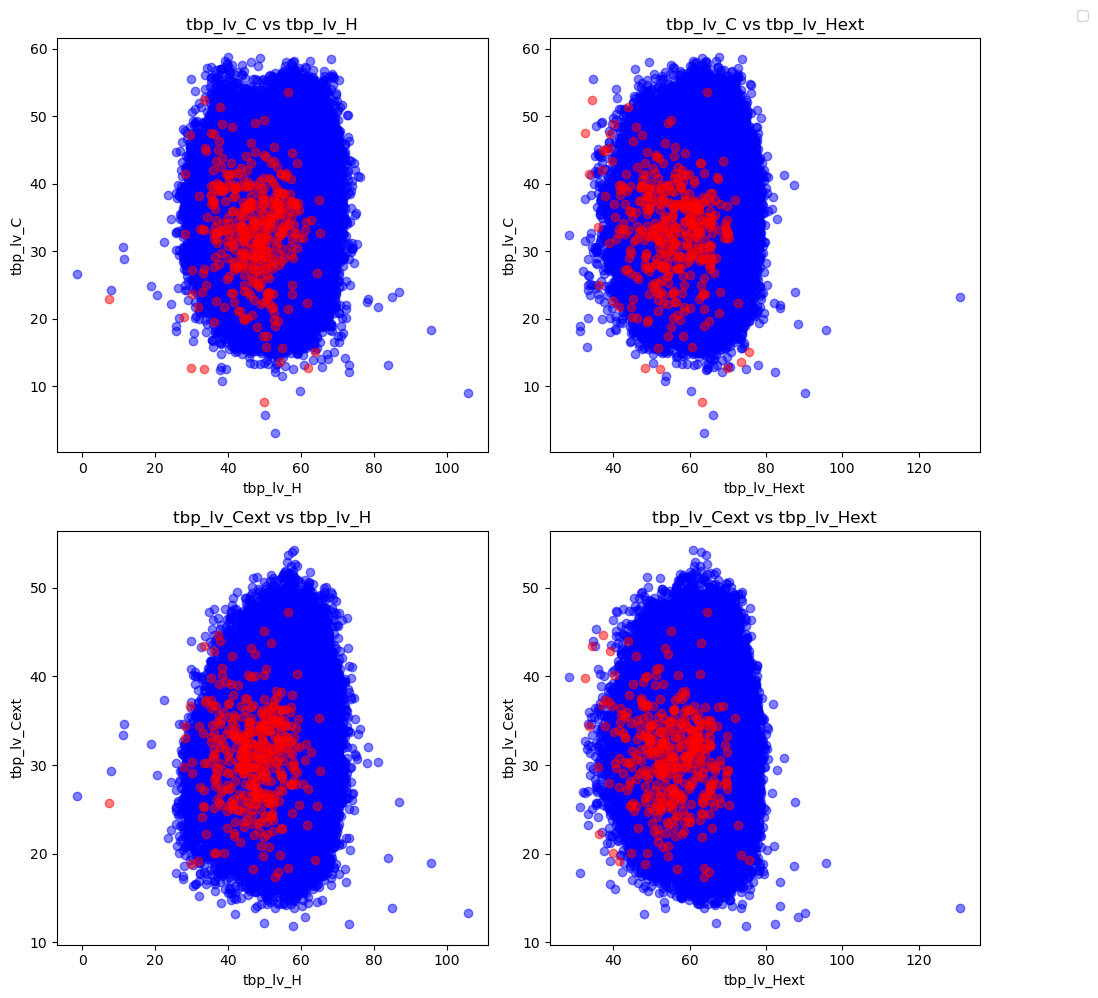

In [941]:
def plot_chroma_hue_pairs(df, chroma_cols, hue_cols, target_col='target', colors=None):

    if colors is None:

        unique_labels = df[target_col].unique()
        colors = {label: plt.cm.tab10(i) for i, label in enumerate(unique_labels)}

    num_chroma = len(chroma_cols)
    num_hue = len(hue_cols)

    fig, axes = plt.subplots(num_chroma, num_hue, figsize=(5 * num_hue, 5 * num_chroma))

    for i, chroma_col in enumerate(chroma_cols):
        for j, hue_col in enumerate(hue_cols):
            ax = axes[i, j] if num_chroma > 1 and num_hue > 1 else axes[max(i, j)]
            for label in df[target_col].unique():
                subset = df[df[target_col] == label]
                ax.scatter(subset[hue_col], subset[chroma_col],
                           c=[colors[label]], alpha=0.5, label=f"Target {label}" if i == 0 and j == 0 else "")
            ax.set_xlabel(hue_col)
            ax.set_ylabel(chroma_col)
            ax.set_title(f"{chroma_col} vs {hue_col}")

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1))
    plt.tight_layout()
    plt.show()



chroma_cols = ['tbp_lv_C', 'tbp_lv_Cext']
hue_cols = ['tbp_lv_H', 'tbp_lv_Hext']


plot_chroma_hue_pairs(skin_data, chroma_cols, hue_cols, colors={0: 'blue', 1: 'red'})


##### Shape


### Feature Descriptions and Importance for Shape

| Feature                  | Description                                      | Importance                                                                 |
|--------------------------|--------------------------------------------------|---------------------------------------------------------------------------|
| **tbp_lv_areaMM2**       | Total area of the lesion (in mm²)                | Larger lesions are often considered higher risk.                         |
| **tbp_lv_perimeterMM**   | Total perimeter length (mm)                      | Long perimeters with small areas indicate irregular shapes.              |
| **tbp_lv_area_perim_ratio** | Area-to-perimeter ratio                        | Low ratios suggest jagged or irregular shapes (e.g., melanoma).          |
| **tbp_lv_eccentricity**  | Eccentricity (0 = circle, 1 = line)              | Elongated or irregular shapes have higher values.                        |
| **tbp_lv_minorAxisMM**   | Minor axis of lesion’s fitted ellipse            | Measures spread and dimensional asymmetry.                               |
| **tbp_lv_norm_border**   | Normalized border irregularity (0–10)            | Combines jaggedness and asymmetry; higher values indicate more irregularity. |
| **tbp_lv_symm_2axis**    | Border asymmetry score (0–10)                    | Higher scores indicate more asymmetry, a classic melanoma sign.          |
| **tbp_lv_symm_2axis_angle** | Angle of asymmetry axis                       | Indicates the direction of least symmetry; useful in spatial models.     |

In [942]:
shape_features = [
    'tbp_lv_areaMM2', 'tbp_lv_perimeterMM',
    'tbp_lv_area_perim_ratio', 'tbp_lv_eccentricity',
    'tbp_lv_minorAxisMM', 'tbp_lv_norm_border', 
    'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle'
]


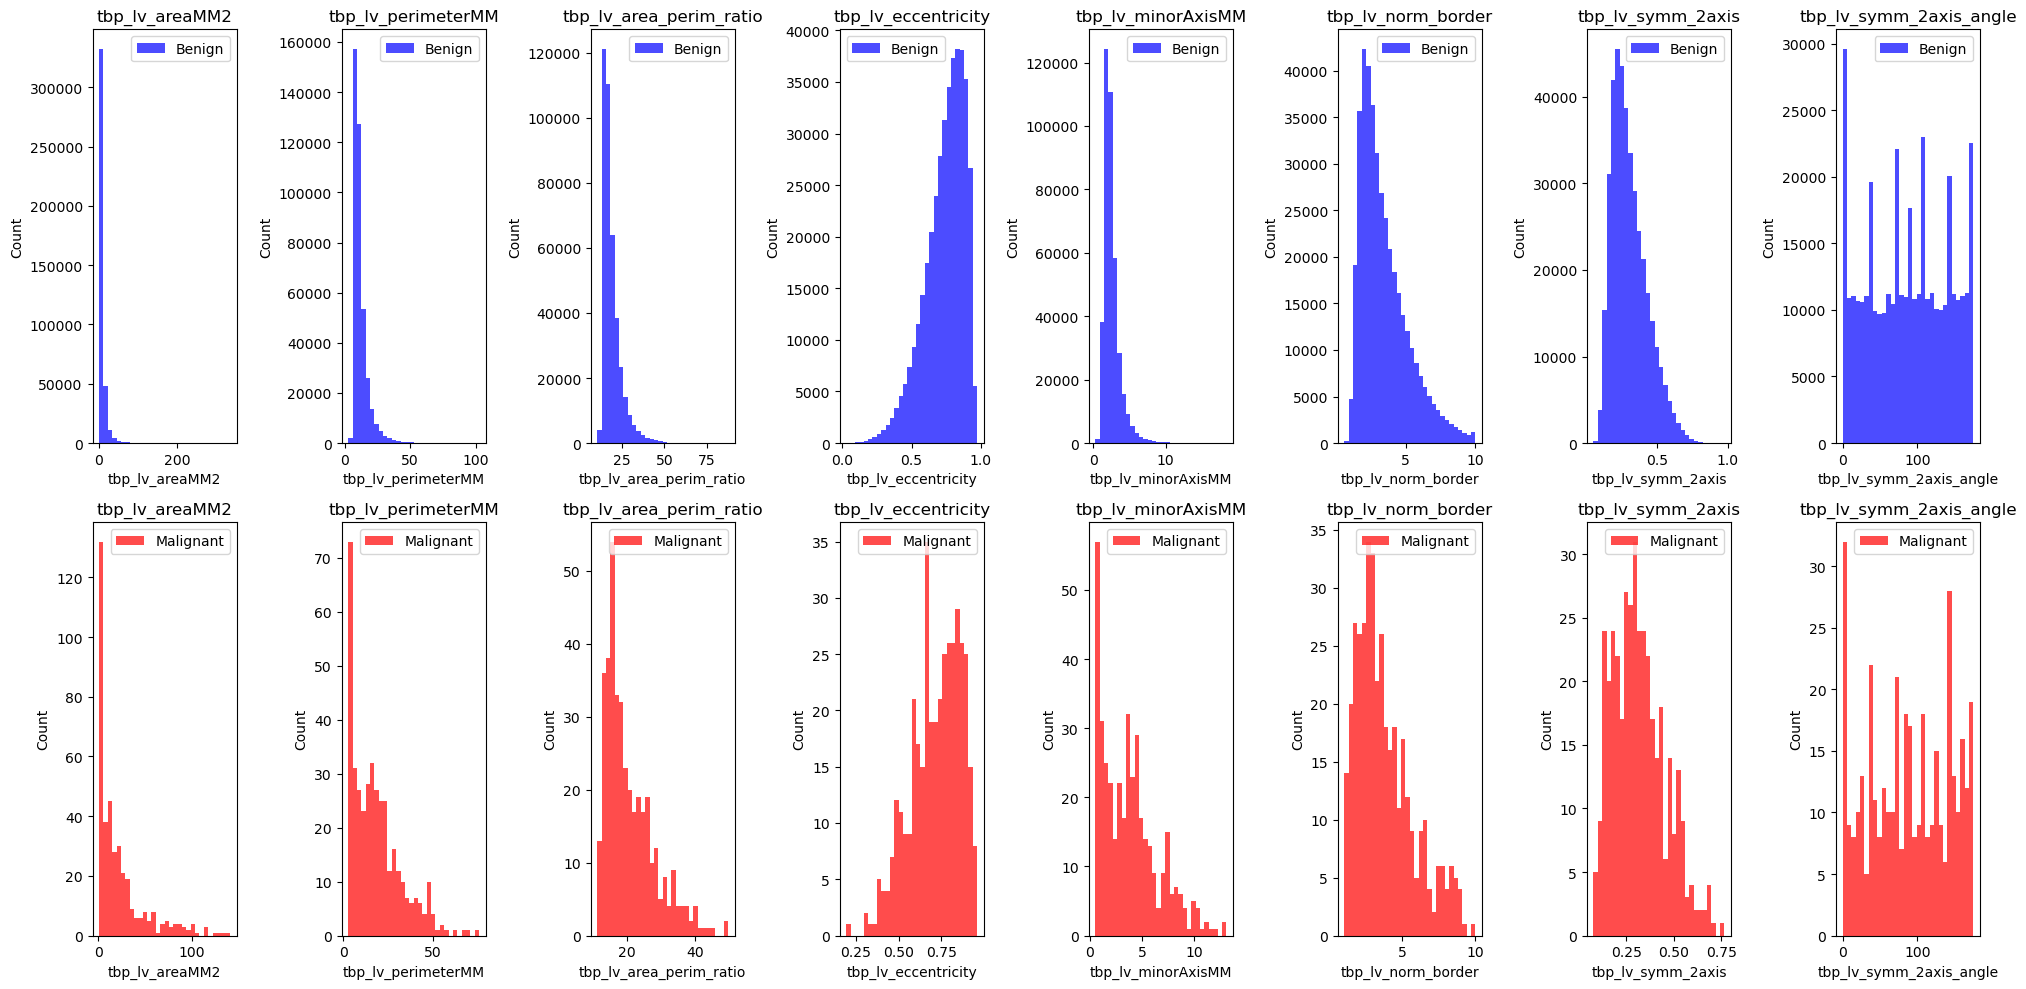

In [943]:
def plot_shape_feature_distributions(data, shape_features):
    malignant = data[data['target'] == 1]
    benign = data[data['target'] == 0]

    num_features = len(shape_features)
    fig, axes = plt.subplots(2, num_features, figsize=(20, 10))

    for i, feature in enumerate(shape_features):

        axes[0, i].hist(benign[feature], bins=30, color='blue', alpha=0.7, label='Benign')
        axes[0, i].set_title(f"{feature}")
        axes[0, i].set_xlabel(feature)
        axes[0, i].set_ylabel("Count")
        axes[0, i].legend()


        axes[1, i].hist(malignant[feature], bins=30, color='red', alpha=0.7, label='Malignant')
        axes[1, i].set_title(f"{feature}")
        axes[1, i].set_xlabel(feature)
        axes[1, i].set_ylabel("Count")
        axes[1, i].legend()

    plt.tight_layout()
    plt.show()

plot_shape_feature_distributions(skin_data, shape_features)

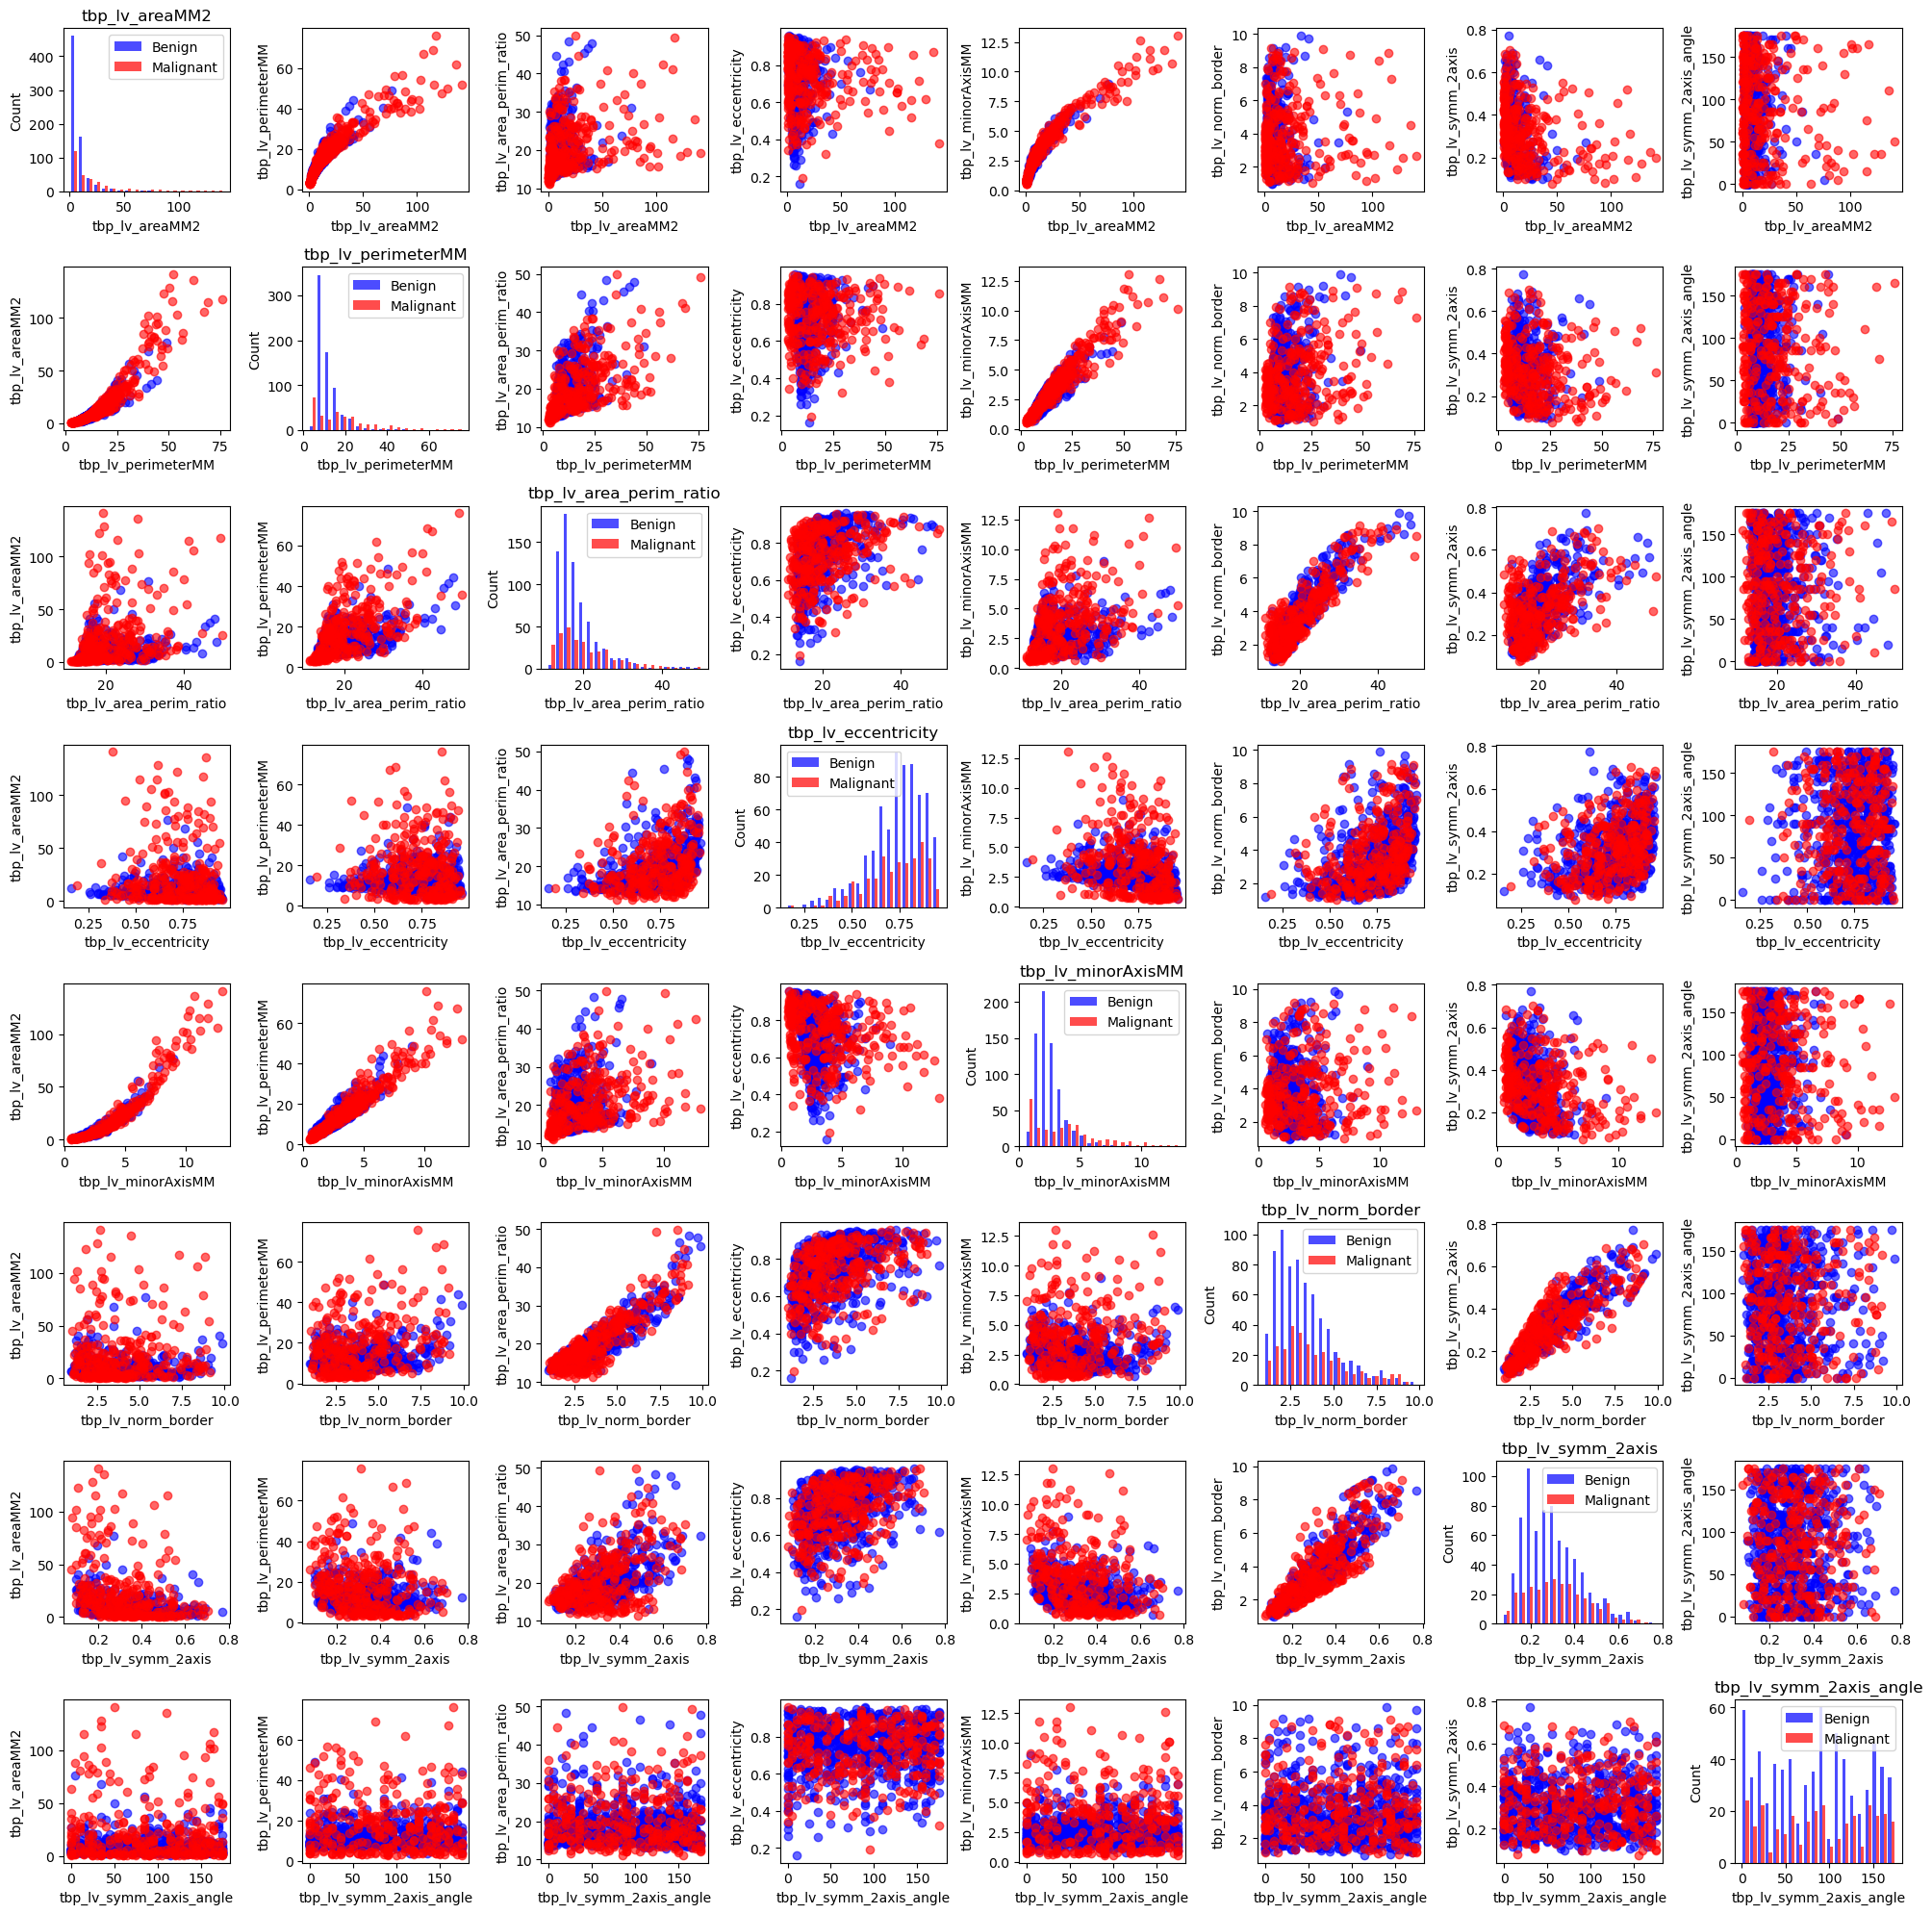

In [944]:
def scatter_plot_shape_features(data, shape_features, benign_sample_size=700, malignant_sample_size=300):
    """
    Plots scatter plots and histograms for shape features for benign and malignant cases.
    """
    benign_data = data[data['target'] == 0].sample(benign_sample_size, random_state=42)
    malignant_data = data[data['target'] == 1].sample(malignant_sample_size, random_state=42)

    sampled_data = pd.concat([benign_data, malignant_data])

    num_features = len(shape_features)
    fig, axes = plt.subplots(num_features, num_features, figsize=(20, 20))

    for i, feature_x in enumerate(shape_features):
        for j, feature_y in enumerate(shape_features):
            ax = axes[i, j]
            if i == j:
                ax.hist(
                    [benign_data[feature_x], malignant_data[feature_x]],
                    bins=20,
                    color=['blue', 'red'],
                    label=['Benign', 'Malignant'],
                    alpha=0.7,
                )
                ax.set_title(feature_x)
                ax.set_xlabel(feature_x)
                ax.set_ylabel("Count")
                ax.legend()
            else:
                ax.scatter(
                    benign_data[feature_x],
                    benign_data[feature_y],
                    color='blue',
                    alpha=0.6,
                    label='Benign',
                )
                ax.scatter(
                    malignant_data[feature_x],
                    malignant_data[feature_y],
                    color='red',
                    alpha=0.6,
                    label='Malignant',
                )
                ax.set_xlabel(feature_x)
                ax.set_ylabel(feature_y)
                if j == 0:
                    ax.set_ylabel(feature_y)
                if i == num_features - 1:
                    ax.set_xlabel(feature_x)

    plt.tight_layout()
    plt.show()


scatter_plot_shape_features(skin_data, shape_features)


### Feature Pairs and Their Insights

| Feature Pair                          | What It Shows                     | Why It’s Interesting                                                                 |
|---------------------------------------|------------------------------------|-------------------------------------------------------------------------------------|
| **tbp_lv_symm_2axis vs tbp_lv_norm_border** | Asymmetry vs Border Irregularity  | Melanomas tend to be both asymmetric and irregular; benign lesions should cluster low/low. |
| **tbp_lv_area_perim_ratio vs tbp_lv_eccentricity** | Compactness vs Elongation         | Irregular/jagged lesions will have low area-to-perimeter and high eccentricity.     |
| **tbp_lv_areaMM2 vs tbp_lv_perimeterMM** | Area vs Border Length             | Could show outliers with big perimeter for small area, a sign of irregular borders. |
| **tbp_lv_areaMM2 vs tbp_lv_minorAxisMM** | Overall Lesion Area vs Shortest Diameter | Could reveal disproportionately wide or long lesions (shape elongation).            |
| **tbp_lv_symm_2axis vs tbp_lv_area_perim_ratio** | Asymmetry vs Shape Complexity     | Both measure non-uniformity — malignant lesions often have high asymmetry + low compactness. |
| **tbp_lv_eccentricity vs tbp_lv_minorAxisMM** | Shape Stretch vs Width            | Stretchy and narrow lesions may behave differently than round, wide ones.          |


##### Location

#### 4. Data Cleaning 
---

In [945]:
skin_data = skin_data.drop(columns=['iddx_full', 'iddx_1','iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index', 'mel_thick_mm', 'lesion_id', 'copyright_license', 'patient_id', 'image_type','tbp_tile_type','attribution'])

skin_data = skin_data.dropna()

skin_data.describe()

target     age_approx  clin_size_long_diam_mm       tbp_lv_A  \
count  381914.000000  381914.000000           381914.000000  381914.000000   
mean        0.000998      57.993082                3.933714      19.949312   
std         0.031569      13.668582                1.745646       3.983557   
min         0.000000       5.000000                1.000000      -2.487115   
25%         0.000000      50.000000                2.840000      17.322385   
50%         0.000000      60.000000                3.370000      19.778390   
75%         0.000000      70.000000                4.380000      22.267498   
max         1.000000      85.000000               28.040000      48.189610   

         tbp_lv_Aext       tbp_lv_B    tbp_lv_Bext       tbp_lv_C  \
count  381914.000000  381914.000000  381914.000000  381914.000000   
mean       14.907976      28.170619      26.805857      34.680555   
std         3.511679       5.229249       4.437515       5.659655   
min        -9.080269      -0.730989       9.237066       3.054228   
25%        12.474831      24.635740      23.782231      30.934328   
50%        14.708640      28.068779      26.601681      34.724055   
75%        17.118785      31.487008      29.528269      38.288499   
max        37.021680      54.306900      48.372700      58.765170   

         tbp_lv_Cext       tbp_lv_H  ...  tbp_lv_perimeterMM  \
count  381914.000000  381914.000000  ...       381914.000000   
mean       30.821552      54.585460  ...           11.891980   
std         4.780907       5.511701  ...            5.932878   
min        11.846520      -1.574164  ...            2.579237   
25%        27.595161      51.510338  ...            8.338364   
50%        30.714839      54.967332  ...           10.015440   
75%        33.834040      58.218206  ...           13.242335   
max        54.305290     105.875784  ...           93.758999   

       tbp_lv_radial_color_std_max    tbp_lv_stdL  tbp_lv_stdLExt  \
count                381914.000000  381914.000000   381914.000000   
mean                      1.018080       2.715964        2.243471   
std                       0.735155       1.736657        0.622774   
min                       0.000000       0.320329        0.636247   
25%                       0.564601       1.459075        1.839337   
50%                       0.903646       2.187907        2.155276   
75%                       1.336739       3.473811        2.537656   
max                      11.491140      17.563650       25.534791   

       tbp_lv_symm_2axis  tbp_lv_symm_2axis_angle       tbp_lv_x  \
count      381914.000000            381914.000000  381914.000000   
mean            0.307173                86.352268      -2.959038   
std             0.125076                52.561128     196.764562   
min             0.052034                 0.000000    -624.870728   
25%             0.211765                40.000000    -146.492453   
50%             0.282828                90.000000      -5.432915   
75%             0.382353               130.000000     140.213950   
max             0.977055               175.000000     614.471700   

            tbp_lv_y       tbp_lv_z  tbp_lv_dnn_lesion_confidence  
count  381914.000000  381914.000000                  3.819140e+05  
mean     1039.370333      55.981827                  9.714498e+01  
std       409.341374      87.971225                  9.027496e+00  
min     -1052.134000    -291.890442                  1.261082e-16  
25%       746.849147      -8.876999                  9.965759e+01  
50%      1172.721313      68.174345                  9.999434e+01  
75%      1341.575055     126.711459                  9.999995e+01  
max      1887.766846     319.407000                  1.000000e+02  

[8 rows x 36 columns]

In [946]:
def create_image_path_col(dataset: 'pd.dataframe') -> 'pd.dataframe':
    """
    Create a column with the image path for each image in the dataset.
    """
    dataset['image_path'] = dataset['isic_id'].apply(lambda x: f'./isic-2024-challenge/train-image/image/{x}.jpg')
    dataset = dataset[['image_path', 'target']]
    return dataset


skin_data_images = create_image_path_col(skin_data)

# print(skin_data_images.iloc[0]['image_path'])

def create_image_path_col_only(dataset: 'pd.dataframe') -> 'pd.dataframe':
    """
    Create a column with the image path for each image in the dataset.
    """
    dataset['image_path'] = dataset['isic_id'].apply(lambda x: f'./isic-2024-challenge/train-image/image/{x}.jpg')
    return dataset

test_data_paths = create_image_path_col_only(test_data)
test_data_paths = test_data_paths[['image_path']]
test_data_paths.to_csv('test_image_paths.csv', index=False)

test_data_paths.head()



image_path
0  ./isic-2024-challenge/train-image/image/ISIC_0...
1  ./isic-2024-challenge/train-image/image/ISIC_0...
2  ./isic-2024-challenge/train-image/image/ISIC_0...

In [947]:
# Move datapoints with target == 1 to the front
sorted_skin_data = pd.concat([skin_data[skin_data['target'] == 1], skin_data[skin_data['target'] == 0]])

# Extract the first 20,000 datapoints
top_20000_data = sorted_skin_data.head(20000)

# Get the label and image_path columns
top_20000_label_and_path = top_20000_data[['target', 'image_path']]
print(top_20000_label_and_path)

top_20000_label_and_path = top_20000_label_and_path.to_csv('label_and_path.csv', index=False)


       target                                         image_path
387         1  ./isic-2024-challenge/train-image/image/ISIC_0...
935         1  ./isic-2024-challenge/train-image/image/ISIC_0...
1245        1  ./isic-2024-challenge/train-image/image/ISIC_0...
1846        1  ./isic-2024-challenge/train-image/image/ISIC_0...
3478        1  ./isic-2024-challenge/train-image/image/ISIC_0...
...       ...                                                ...
20611       0  ./isic-2024-challenge/train-image/image/ISIC_0...
20612       0  ./isic-2024-challenge/train-image/image/ISIC_0...
20614       0  ./isic-2024-challenge/train-image/image/ISIC_0...
20615       0  ./isic-2024-challenge/train-image/image/ISIC_0...
20616       0  ./isic-2024-challenge/train-image/image/ISIC_0...

[20000 rows x 2 columns]


In [948]:
# categorical_features = skin_data.select_dtypes(include=['object']).columns.tolist()
# print(categorical_features)


In [949]:
# print(skin_data['tbp_lv_location_simple'].value_counts())

In [950]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def preprocess_skin_data(dataset):
    """
    Preprocess the skin dataset by applying label encoding and one-hot encoding.

    Args:
        dataset (pd.DataFrame): The input dataset to preprocess.

    Returns:
        pd.DataFrame: The preprocessed dataset.
    """
    # Columns to label encode
    columns_to_label_encode = ['sex', 'anatom_site_general', 'tbp_lv_location_simple']

    # Dictionary to store label encoders
    label_encoders = {}

    # Apply LabelEncoder to the specified columns
    for column in columns_to_label_encode:
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column].astype(str))
        label_encoders[column] = le

    # One-hot encode tbp_lv_location
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = one_hot_encoder.fit_transform(dataset[['tbp_lv_location']])
    # Modify unique values to be lowercased, replace whitespace with underscores, and replace hyphens with underscores
    modified_categories = [value.lower().replace(' ', '_').replace('-', '') for value in one_hot_encoder.categories_[0]]
    one_hot_encoded_df = pd.DataFrame(
        one_hot_encoded, 
        columns=modified_categories,  # Use modified unique values as column names
        index=dataset.index
    )

    # Add the one-hot encoded columns to the original dataframe
    dataset = pd.concat([dataset, one_hot_encoded_df], axis=1)

    # Drop the original tbp_lv_location column if no longer needed
    dataset.drop(columns=['tbp_lv_location'], inplace=True)

    return dataset

# Example usage:
preprocessed_data = preprocess_skin_data(skin_data)
print(preprocessed_data.head())


        isic_id  target  age_approx  sex  anatom_site_general  \
0  ISIC_0015670       0        60.0    1                    2   
1  ISIC_0015845       0        60.0    1                    1   
2  ISIC_0015864       0        60.0    1                    3   
3  ISIC_0015902       0        65.0    1                    0   
4  ISIC_0024200       0        55.0    1                    0   

   clin_size_long_diam_mm   tbp_lv_A  tbp_lv_Aext   tbp_lv_B  tbp_lv_Bext  \
0                    3.04  20.244422    16.261975  26.922447    23.954773   
1                    1.10  31.712570    25.364740  26.331000    24.549290   
2                    3.40  22.575830    17.128170  37.970460    33.485410   
3                    3.22  14.242329    12.164757  21.448144    21.121356   
4                    2.73  24.725520    20.057470  26.464900    25.710460   

   ...  right_leg  right_leg__lower  right_leg__upper  torso_back  \
0  ...        0.0               0.0               1.0         0.0   
1  ...  

In [951]:
features = skin_data.columns.tolist()
print(features)

['isic_id', 'target', 'age_approx', 'sex', 'anatom_site_general', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'tbp_lv_dnn_lesion_confidence', 'image_path']


In [952]:
skin_data = skin_data.drop(columns=['isic_id', 'image_path'])


In [953]:
preprocessed_data = preprocessed_data.drop(columns=['isic_id', 'image_path'])
preprocessed_data_test  = preprocess_skin_data(test_data)
preprocessed_data_test = preprocessed_data_test.drop(columns=['isic_id', 'patient_id', 'image_type','tbp_tile_type','attribution', 'copyright_license'])



missing_columns = set(preprocessed_data.columns) - set(preprocessed_data_test.columns)

# Add missing columns with default value 0
for col in missing_columns:
    preprocessed_data_test[col] = 0  # Add the missing column with default value 0

# Ensure the 'target' column exists in preprocessed_data_test
if 'target' not in preprocessed_data_test.columns:
    preprocessed_data_test['target'] = 0  # Add the 'target' column with default value 0

# Reorder columns to match preprocessed_data
preprocessed_data_test = preprocessed_data_test[preprocessed_data.columns]
# Drop the 'target' column from both preprocessed_data and preprocessed_data_test
preprocessed_data_test = preprocessed_data_test.drop(columns=['target', 'tbp_lv_dnn_lesion_confidence'])
preprocessed_data = preprocessed_data.drop(columns=['tbp_lv_dnn_lesion_confidence'])
print(preprocessed_data.columns.tolist())
print(preprocessed_data_test.columns.tolist())


print(preprocessed_data_test.head())
print(preprocessed_data.head())




['target', 'age_approx', 'sex', 'anatom_site_general', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_location_simple', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'head_&_neck', 'left_arm', 'left_arm__lower', 'left_arm__upper', 'left_leg', 'left_leg__lower', 'left_leg__upper', 'right_arm', 'right_arm__lower', 'right_arm__upper', 'right_leg', 'right_leg__lower', 'right_leg__upper', 'torso_back', 'torso_back_bottom_third', 'torso_back_middle_third', 'torso_back_top_third', 

In [954]:
preprocessed_data.to_csv('preprocessed_train_data.csv', index=False)
preprocessed_data_test.to_csv('preprocessed_test_data.csv', index=False)

In [955]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

# # Sort the data so that malignant datapoints are upfront
# sorted_preprocessed_data = pd.concat([preprocessed_data[preprocessed_data['target'] == 1], preprocessed_data[preprocessed_data['target'] == 0]])

# # Take the first 1000 datapoints
# top_1000_data = sorted_preprocessed_data.head(1000)

# # Select the tbp_lv columns up to tbp_lv_dnn_lesion_confidence
# tbp_lv_columns = [col for col in top_1000_data.columns if col.startswith('tbp_lv_') and col != 'tbp_lv_dnn_lesion_confidence']

# # Features (X) and target (y)
# X = top_1000_data[tbp_lv_columns]
# y = top_1000_data['tbp_lv_dnn_lesion_confidence']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a Random Forest Regressor
# model = RandomForestRegressor(random_state=42, n_estimators=200)
# model.fit(X_train, y_train)

# # Predict on the test set
# y_pred = model.predict(X_test)

# # Round predictions to 3 significant figures
# y_pred_rounded = np.round(y_pred, 3)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")

# # Example: Display the first 10 predictions
# print("Predictions (rounded to 3 significant figures):", y_pred_rounded[:10])

In [956]:
# skin_data.to_csv('skin_data.csv', index=False)

In [957]:
# print(skin_data_images.iloc[0]['image_path'])
# print(processed_skin_data.iloc[0]['image_path'])

# benign = skin_data['target'].value_counts()[0] # benign
# malignant = skin_data['target'].value_counts()[1] # malignant
# print(f'Dataset contains {benign} benign classifications and {malignant} malignant classifications. Each associated with a unique image')